In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [61]:
df = pd.read_csv('F:\mechine_learning\Data\Social_Network_Ads.csv')

In [62]:
df.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [63]:
df=df[['Age','EstimatedSalary','Purchased']]

In [64]:
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


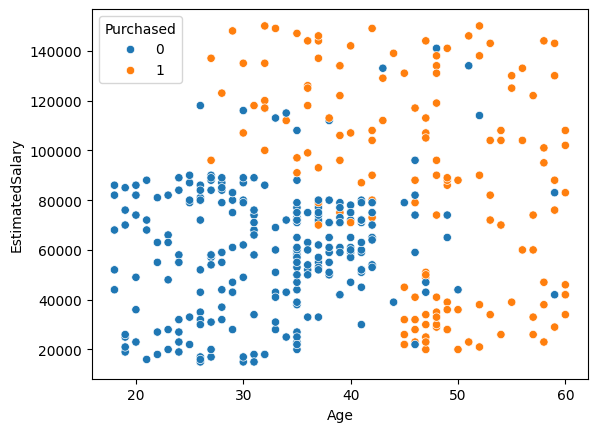

In [65]:
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=df)
plt.show()

In [66]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [67]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [68]:
x=df.iloc[:, :-1]
y=df['Purchased']

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
sc = StandardScaler()


In [71]:
sc.fit(x)

StandardScaler()

In [72]:
x= pd.DataFrame(sc.transform(x),columns=x.columns)
x.head(5)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [75]:
x_train.shape

(320, 2)

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
dt= DecisionTreeClassifier(max_depth=4) #pre pruning

In [78]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [79]:
dt.score(x_train,y_train)*100

92.5

In [80]:
dt.score(x_test,y_test)*100

95.0

In [81]:
from sklearn.tree import plot_tree

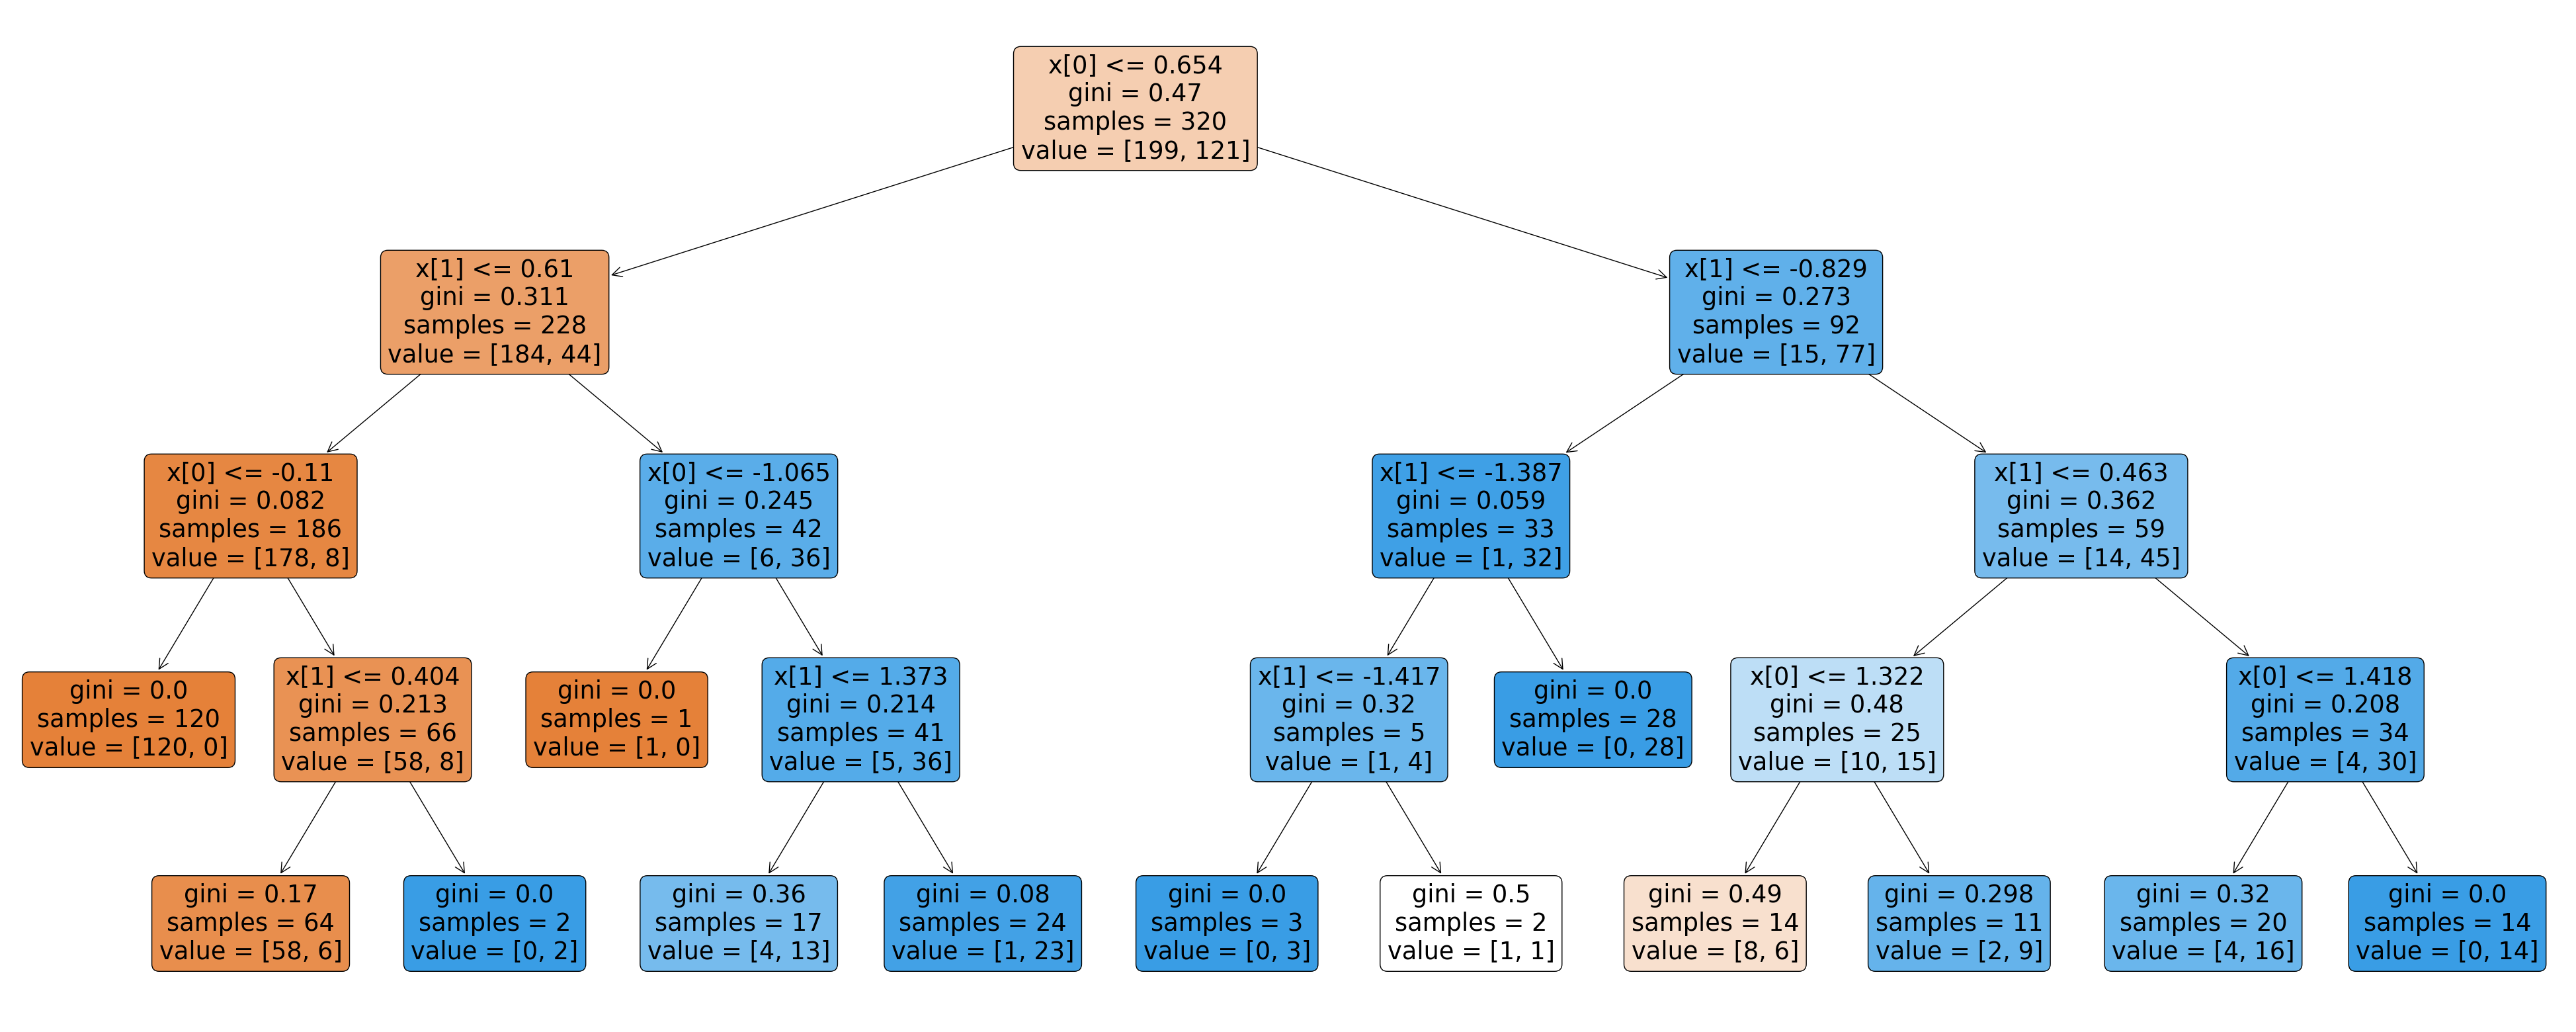

In [82]:
plt.figure(figsize=(50,20))
plot_tree(dt,filled=True,rounded=True)
plt.savefig('tree.png')
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


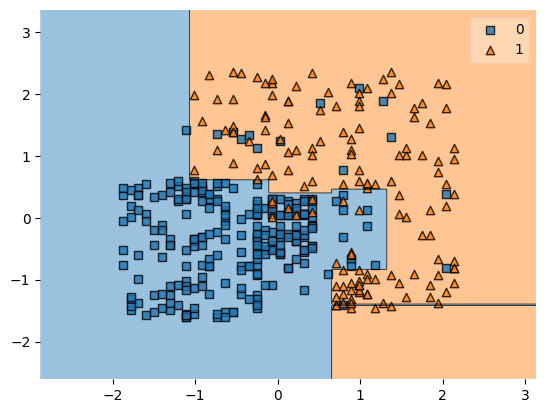

In [83]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt)
plt.show()

In [ ]:
#post pruning
for i in range(1,20):
    dt= DecisionTreeClassifier(max_depth=i) 
    dt.fit(x_train,y_train)
    print(f"max_depth={i} train score={dt.score(x_train,y_train)*100} test score={dt.score(x_test,y_test)*100}")

max_depth=1 train score=81.5625 test score=92.5
max_depth=2 train score=90.9375 test score=95.0
max_depth=3 train score=91.25 test score=95.0
max_depth=4 train score=92.5 test score=95.0
max_depth=5 train score=93.75 test score=93.75
max_depth=6 train score=95.0 test score=88.75
max_depth=7 train score=96.5625 test score=92.5
max_depth=8 train score=97.5 test score=91.25
max_depth=9 train score=97.8125 test score=92.5
max_depth=10 train score=98.4375 test score=92.5
max_depth=11 train score=99.0625 test score=91.25
max_depth=12 train score=99.0625 test score=90.0
max_depth=13 train score=99.375 test score=91.25
max_depth=14 train score=99.6875 test score=91.25
max_depth=15 train score=99.6875 test score=91.25
max_depth=16 train score=99.6875 test score=91.25
max_depth=17 train score=99.6875 test score=90.0
max_depth=18 train score=99.6875 test score=90.0
max_depth=19 train score=99.6875 test score=91.25


In [85]:
dt1= DecisionTreeClassifier(criterion='entropy',max_depth=3)

In [86]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [87]:
dt1.score(x_test,y_test)*100

95.0

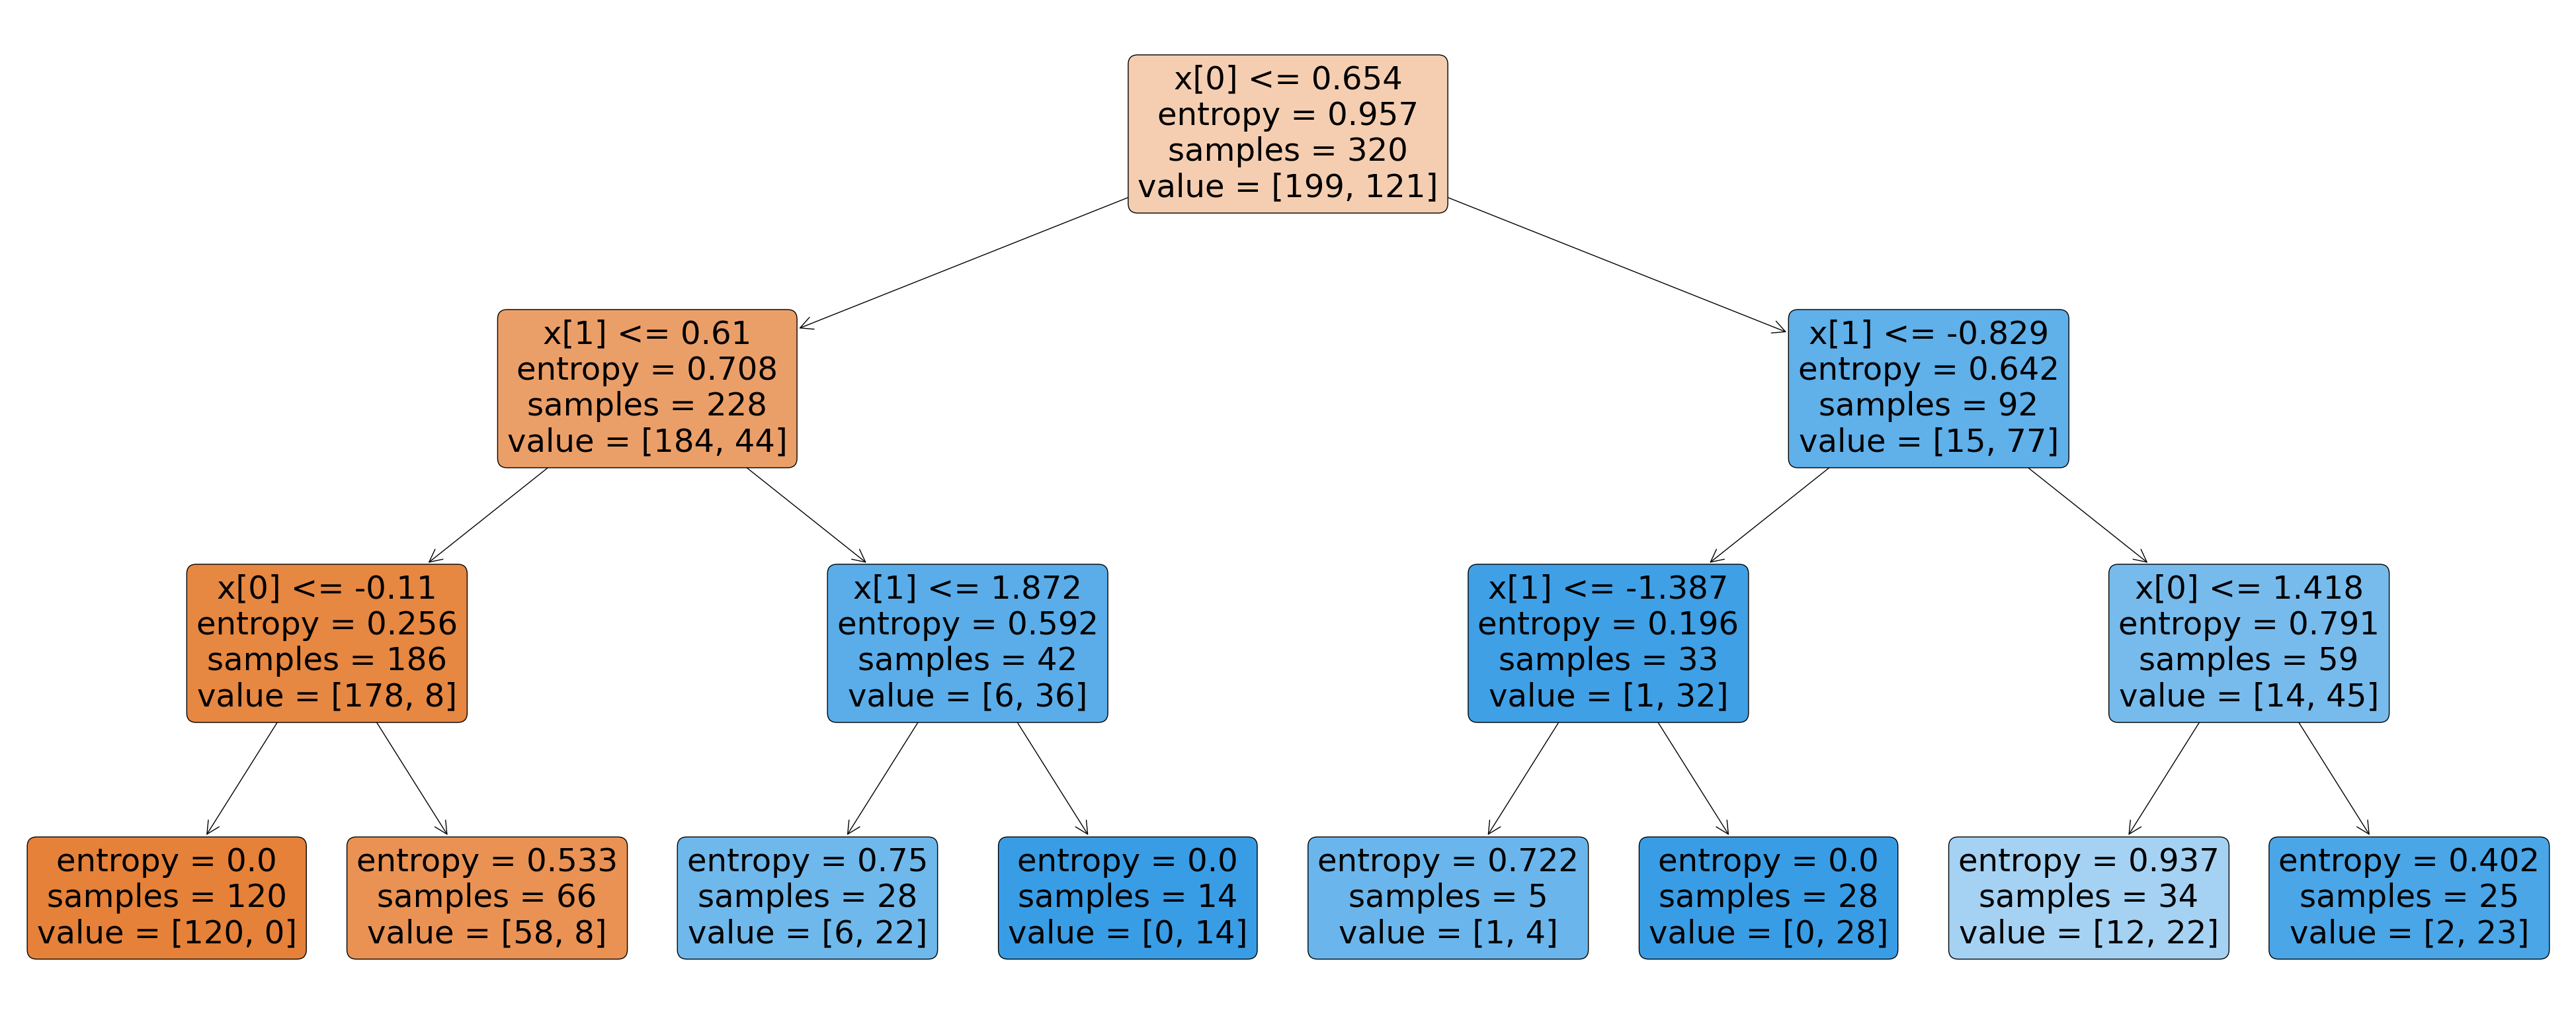

In [88]:
plt.figure(figsize=(50,20))
plot_tree(dt1,filled=True,rounded=True)
plt.savefig('treeentropy.png')
plt.show()

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


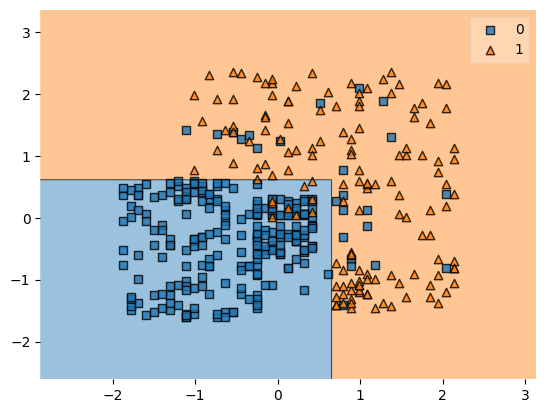

In [89]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=dt1)
plt.show()